# The Classic Rock Paper Scissors Classification

The aims is to classify rock-paper-scissors by applying sequencial model then automating validation accuracy.

In [1]:
# import tensorflow package
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# checking tensorflow package version
print(tf.__version__)

2.5.0


In [3]:
# dataset: rock-paper-scissor images
# source: 
!wget --no-check-certificate https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip

--2021-07-04 17:42:16--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip.1’

rockpaperscissors.z 100%[===================>] 307.92M  8.03MB/s    in 40s     

2021-07-04 17:42:57 (7.71 MB/s) - ‘rockpaperscissors.zip.1’ saved [322873683/322873683]



In [4]:
# extraacting zip (rockpaperscissors.zip)
import zipfile,os
local_zip = 'rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [5]:
# arranging
import os
paper = os.path.join('/tmp/rockpaperscissors/paper')
rock = os.path.join('/tmp/rockpaperscissors/rock')
scissor = os.path.join('/tmp/rockpaperscissors/scissors')

In [6]:
# implementing image data generator
base = '/tmp/rockpaperscissors/rps-cv-images/'
train_val_split = ImageDataGenerator(
    rescale = 1.0/150,
    horizontal_flip = True,
    rotation_range = 30,
    zoom_range = 0.2,
    validation_split = 0.2 # splitting training and validation by ratio 80:20

)

In [7]:
# split train and val
train_gen = train_val_split.flow_from_directory(
    base, target_size=(150, 150), class_mode='categorical', shuffle=True, subset='training'
)
val_gen = train_val_split.flow_from_directory(
    base, target_size=(150, 150), class_mode='categorical', shuffle=True, subset = 'validation'
)

Found 1751 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


In [8]:
# applying sequential model
seq_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(216, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

seq_model.summary()

seq_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 128)       36992     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 36992)             0

In [9]:
# making callback, stopping training when val_accuracy > 0.9
class Callback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy') > 0.9):
      print("\nstop")
      self.model.stop_training = True

In [10]:
# training
hist = seq_model.fit(
    train_gen,
    steps_per_epoch=20,
    epochs=100,
    validation_data=val_gen,
    validation_steps=5,
    verbose=2,
    callbacks=[Callback()]
    )

Epoch 1/100
20/20 - 42s - loss: 1.3394 - accuracy: 0.3547 - val_loss: 1.0408 - val_accuracy: 0.5250
Epoch 2/100
20/20 - 41s - loss: 0.9467 - accuracy: 0.5531 - val_loss: 0.9256 - val_accuracy: 0.5500
Epoch 3/100
20/20 - 40s - loss: 0.7986 - accuracy: 0.6498 - val_loss: 0.6165 - val_accuracy: 0.8375
Epoch 4/100
20/20 - 40s - loss: 0.5689 - accuracy: 0.7781 - val_loss: 0.5243 - val_accuracy: 0.8188
Epoch 5/100
20/20 - 40s - loss: 0.4255 - accuracy: 0.8463 - val_loss: 0.3991 - val_accuracy: 0.8500
Epoch 6/100
20/20 - 40s - loss: 0.3937 - accuracy: 0.8687 - val_loss: 0.3538 - val_accuracy: 0.8875
Epoch 7/100
20/20 - 40s - loss: 0.3383 - accuracy: 0.8875 - val_loss: 0.2628 - val_accuracy: 0.9000
Epoch 8/100
20/20 - 41s - loss: 0.3112 - accuracy: 0.8953 - val_loss: 0.3403 - val_accuracy: 0.9000
Epoch 9/100
20/20 - 40s - loss: 0.3540 - accuracy: 0.8716 - val_loss: 0.3348 - val_accuracy: 0.8938
Epoch 10/100
20/20 - 41s - loss: 0.3449 - accuracy: 0.8609 - val_loss: 0.3799 - val_accuracy: 0.8750

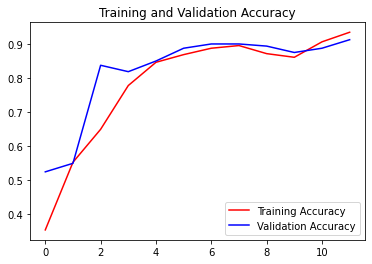

<Figure size 432x288 with 0 Axes>

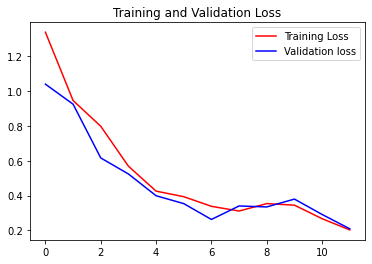

<Figure size 432x288 with 0 Axes>

In [18]:
# plotting
import matplotlib.pyplot as plt
accuracy = hist.history['accuracy']
val_accuracy = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(len(accuracy))

# Training and Validation Accuracy
plt.plot(epochs, accuracy, 'r', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

# Training and validation loss
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend(loc=0)
plt.figure()
plt.show()

# Test the Model

In [19]:
import numpy as np
from google.colab import files
from keras.preprocessing import image 

uploaded = files.upload()

# storing prediction into output
output = []

# predicting input
for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(150,150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = seq_model.predict(images, batch_size=10)
  
  # we can easily matching appropriate name file with prediction
  if classes[0, 0] == 1:
    output.append(f"{fn}: paper")
  elif classes[0, 1] == 1:
    output.append(f"{fn}: rock")
  elif classes[0, 2] == 1:
    output.append(f"{fn}: scissor")
  else:
    output.append(f"{fn}: unknown")

print(output)

Saving paper.jpeg to paper.jpeg
['paper.jpeg: paper']


In [22]:
# Model conversion.
converter = tf.lite.TFLiteConverter.from_keras_model(seq_model)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmpa26879d9/assets


INFO:tensorflow:Assets written to: /tmp/tmpa26879d9/assets


In [23]:
with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)